In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.split_award import SplitAwardAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

In [2]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [1, 1.4]}
a_space = {'1': [[1.0 ,2.5], [0.3 ,1.2]]}

param_prior= {
    'distribution':'gaussian_trunc', 
    'mu': 1.2, 
    'sigma': 0.1}


param_util ={
    'tie_breaking': 'random',
    'scale': 0.3,
            }

# parameter approximation game
n = 32
m = 32

# create mechanism
mechanism = SplitAwardAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)


**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(1e3)
tol = 1e-4
stop_criterion = 'util_loss'
regularizer = 'euclidean'
steprule_bool = True
eta = 0.05
beta = 0.5

#learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
learner = FrankWolfe(max_iter, tol, stop_criterion, 'standard', False, eta, beta)

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=False)

 94%|██████████████████▊ | 943/1.00k [00:33<00:01, 28.5it/s] 

Convergence after 943 iterations
Value of stopping criterion (util_loss) 0.0001


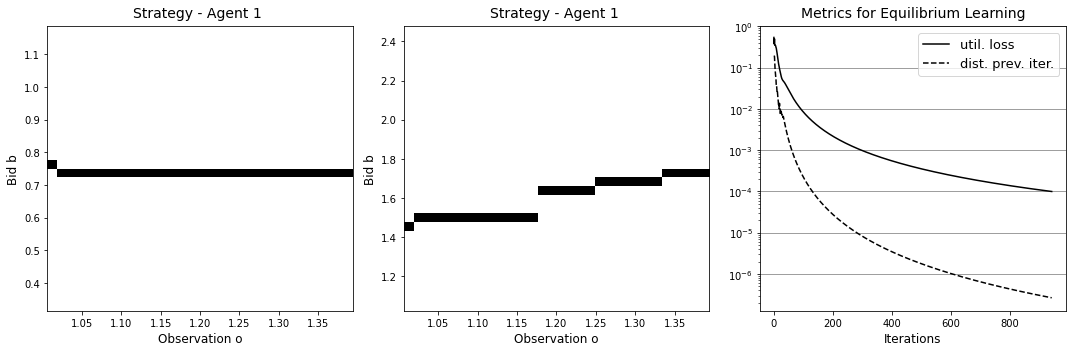

In [5]:
agent = '1'
strategies[agent].plot(metrics=True)